In [3]:
import numpy as np
from numpy.random import poisson

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['font.size'] = 12
# mpl.rcParams.keys()

In [5]:
# Function definitions
def extract_counts (c_low = 50, c_high = 100, rate = 5., dt = 1., n_steps = 100, all_counts = False):
    lam = rate*dt
    counts = np.zeros(n_steps)
    temp = 0

    for i in range(0, n_steps):
        counts[i] = poisson(lam) + temp
        temp = counts[i]

    if all_counts == True:
        return counts

    return counts[c_low - 1], counts[c_high - 1]

def plot_histo (data, label = 'Default_name'):
    min, max = int(np.min(data)), int(np.max(data)) + 1
    bins = np.linspace(min, max, max - min + 1)
    n, bins, p = plt.hist(data, bins, label = label, alpha = 0.7)
    return n, bins

In [43]:
rate, dt, n_steps = 5., 1., 100

# counts = extract_counts (c_low = 50, c_high = 100, rate = rate, dt = dt, n_steps = n_steps, all_counts = True)
# t_space = np.linspace(0, n_steps, n_steps)
# plt.step(t_space, counts, where='post')
# plt.title("Cumulative counts in one bin")
# plt.xlabel("Iterations")
# plt.ylabel("Counts")
# plt.grid()

# Each element is a result of a Point Poisson Process
low_c = np.array([])
high_c = np.array([])

nr_PPP = 100000   # Number of Poisson Point Processes generated

for i in range(nr_PPP):
    l, h = extract_counts (c_low = 50, c_high = 100, rate = rate, dt = dt, n_steps = n_steps)
    low_c = np.append(low_c, l)
    high_c = np.append(high_c, h)

# ---------- Some verifications:
# print(low_c, np.max(low_c))
# print(high_c)

# of entries (== # of generated PPP): 100000.0 100000.0
Variances: 249.45 - 498.64 
Ratio: 0.5003

Means: 250.03 - 500.01 
Ratio: 0.5000


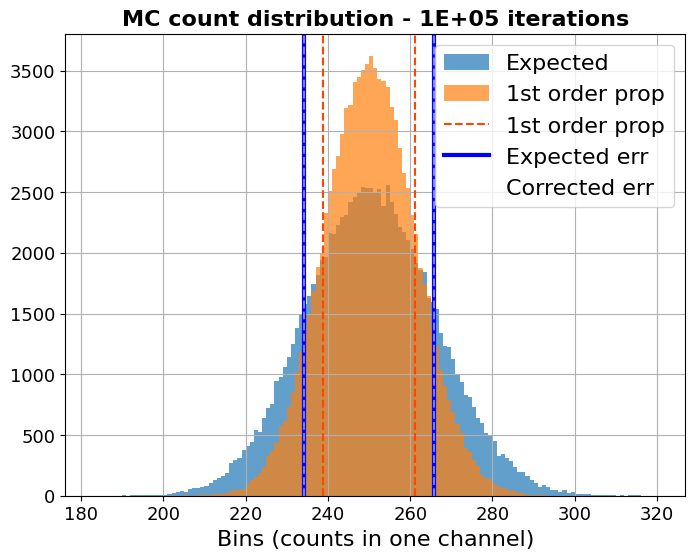

In [75]:
# ---------- From 15 minutes to 30 minutes
# n_h, bins_h = plot_histo(high_c, label = 'Effective')
# n_l, bins_l = plot_histo(low_c*2, label = 'Half*2')

# ---------- From 30 minutes to 15 minutes
n_l, bins_l = plot_histo(low_c, label = 'Expected')
n_h, bins_h = plot_histo(high_c/2, label = '1st order prop')

# ---------- Variances and mean values
print("# of entries (== # of generated PPP):", n_l.sum(), n_h.sum())

v_l = np.std(low_c)**2
v_h = np.std(high_c)**2
print(f"Variances: {v_l:.2f} - {v_h:.2f}", f"\nRatio: {v_l/v_h:.4f}")

m_l = np.mean(low_c)
m_h = np.mean(high_c)
print(f"\nMeans: {m_l:.2f} - {m_h:.2f}", f"\nRatio: {m_l/m_h:.4f}")

# ---------- Aesthetics

plt.axvline(m_h/2 - np.sqrt(v_h)/2, ls='--', c='orangered',label='1st order prop')
plt.axvline(m_h/2 + np.sqrt(v_h)/2, ls='--', c='orangered')
plt.axvline(m_l - np.sqrt(v_l), c='b', lw=3, label='Expected err')
plt.axvline(m_l + np.sqrt(v_l), c='b', lw=3)
plt.axvline(m_h/2 - np.sqrt(v_h/2), ls='--', c='white', alpha=0.5, label='Corrected err')
plt.axvline(m_h/2 + np.sqrt(v_h/2), ls='--', c='white', alpha=0.5)

plt.legend()
plt.grid()
plt.title(f"MC count distribution - {nr_PPP:.0E} iterations")
plt.xlabel("Bins (counts in one channel)")

# plt.savefig("MC_da30min_a15min.png")
# plt.savefig("MC_da15min_a30min.png")